In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR

# Load the dataset
file_path = '/content/Tamil_Nadu_Post_Office_Data.xlsx'  # Replace with your file path
df = pd.read_excel(file_path)

In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 221 entries, 0 to 220
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Year                         221 non-null    int64  
 1   Month                        221 non-null    object 
 2   Total Savings Accounts       221 non-null    int64  
 3   Pension Recipients           221 non-null    int64  
 4   New Funds Provided           221 non-null    int64  
 5   Post Office Users            221 non-null    int64  
 6   Average Balance per Account  221 non-null    int64  
 7   Number of Post Offices       221 non-null    int64  
 8   Number of Branches           221 non-null    int64  
 9   Total Deposits               221 non-null    int64  
 10  Unnamed: 10                  48 non-null     float64
dtypes: float64(1), int64(9), object(1)
memory usage: 19.1+ KB
None


In [5]:
print(df.head())

   Year Month  Total Savings Accounts  Pension Recipients  New Funds Provided  \
0  2000   Jan                  200000               40000              800000   
1  2000   Feb                  202000               41000              820000   
2  2000   Mar                  204000               42000              840000   
3  2000   Apr                  206000               43000              860000   
4  2000   May                  208000               44000              880000   

   Post Office Users  Average Balance per Account  Number of Post Offices  \
0             150000                         5000                    1000   
1             152000                         5100                    1010   
2             154000                         5200                    1020   
3             156000                         5300                    1030   
4             158000                         5400                    1040   

   Number of Branches  Total Deposits  Unnamed: 10

In [6]:
print("Column names in the dataset:")
print(df.columns)

Column names in the dataset:
Index(['Year', 'Month', 'Total Savings Accounts', 'Pension Recipients',
       'New Funds Provided', 'Post Office Users',
       'Average Balance per Account', 'Number of Post Offices',
       'Number of Branches', 'Total Deposits', 'Unnamed: 10'],
      dtype='object')


In [7]:
savings_by_year = df.groupby('Year')['Total Savings Accounts'].sum()  # Replace with the actual column name

# Print the result
print("\nTotal Savings Accounts Opened by Year:")
print(savings_by_year)


Total Savings Accounts Opened by Year:
Year
2000    2532000
2001    2820000
2002    3108000
2003    3396000
2004    3684000
2011    4572000
2012    4860000
2013    5148000
2014    5436000
2015    5724000
2016    6012000
2017    6300000
2018    6588000
2019    6876000
2020    7164000
2021    2990000
2022    7452000
2023    7740000
2024    7464000
Name: Total Savings Accounts, dtype: int64


In [8]:
funds_by_year = df.groupby('Year')['New Funds Provided'].sum()
print("\nTotal New Funds Provided by Year:")
print(funds_by_year)


Total New Funds Provided by Year:
Year
2000    10920000
2001    13800000
2002    16680000
2003    19560000
2004    22440000
2011    30360000
2012    33240000
2013    36120000
2014    39000000
2015    41880000
2016    44760000
2017    47640000
2018    50520000
2019    53400000
2020    56280000
2021    23400000
2022    59160000
2023    62040000
2024    38640000
Name: New Funds Provided, dtype: int64


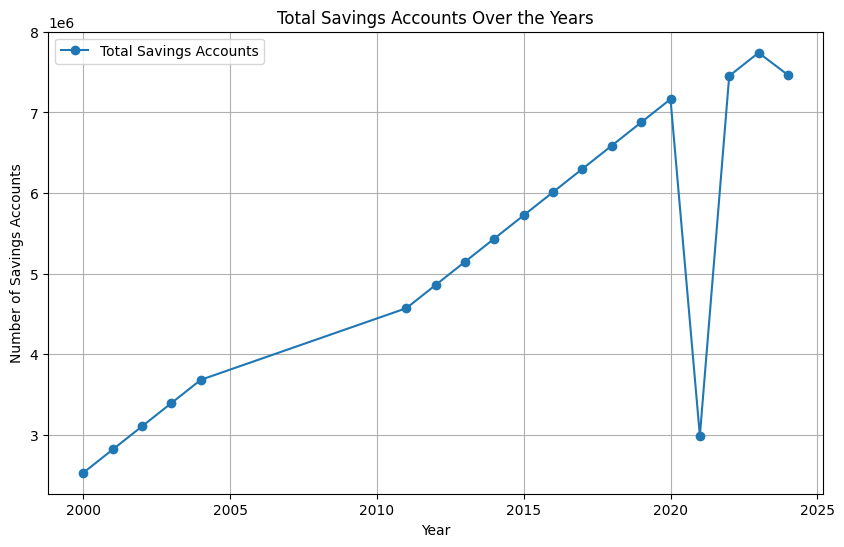

In [9]:
savings_by_year = df.groupby('Year')['Total Savings Accounts'].sum()
plt.figure(figsize=(10,6))
plt.plot(savings_by_year.index, savings_by_year.values, marker='o', label='Total Savings Accounts')
plt.title('Total Savings Accounts Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Savings Accounts')
plt.grid(True)
plt.legend()
plt.show()

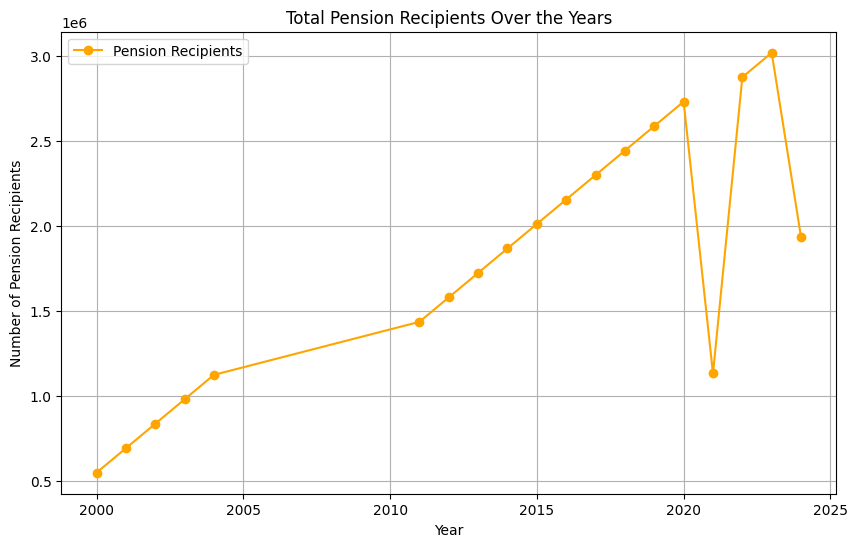

In [10]:
pension_by_year = df.groupby('Year')['Pension Recipients'].sum()
plt.figure(figsize=(10,6))
plt.plot(pension_by_year.index, pension_by_year.values, marker='o', color='orange', label='Pension Recipients')
plt.title('Total Pension Recipients Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Pension Recipients')
plt.grid(True)
plt.legend()
plt.show()

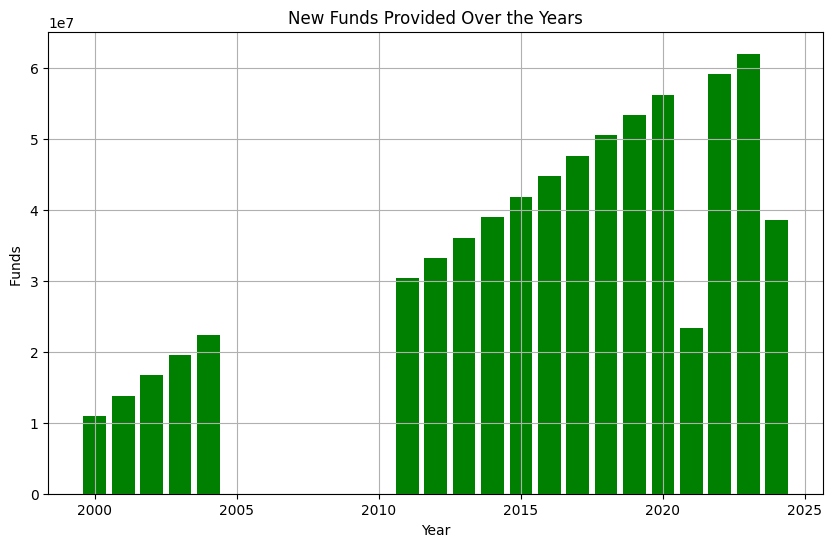

In [11]:
funds_by_year = df.groupby('Year')['New Funds Provided'].sum()
plt.figure(figsize=(10,6))
plt.bar(funds_by_year.index, funds_by_year.values, color='green')
plt.title('New Funds Provided Over the Years')
plt.xlabel('Year')
plt.ylabel('Funds ')
plt.grid(True)
plt.show()

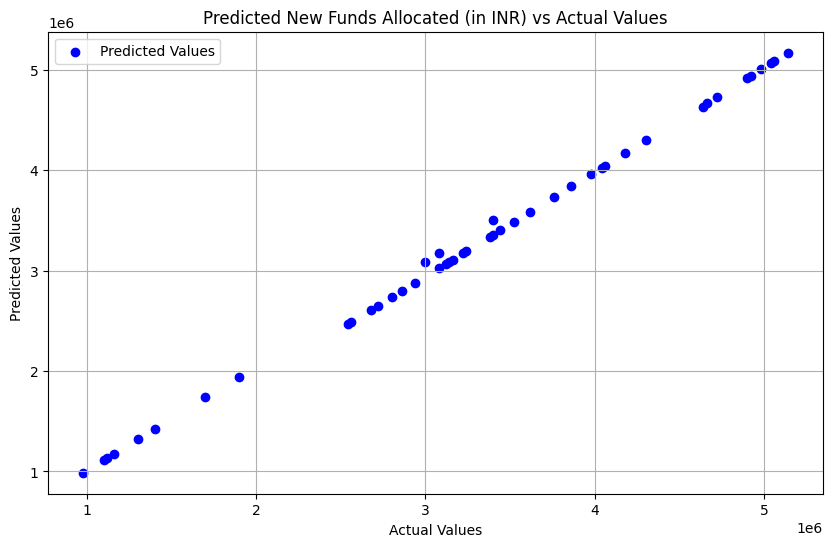

R-squared: 1.00


In [12]:
X = df[['Pension Recipients']]
y = df['New Funds Provided']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

y_pred = lr_model.predict(X_test)

# Plotting the predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', label='Predicted Values')
plt.title('Predicted New Funds Allocated (in INR) vs Actual Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.grid(True)
plt.legend()
plt.show()

# Calculating the coefficient of determination (R-squared)
r2 = lr_model.score(X_test, y_test)
print(f'R-squared: {r2:.2f}')

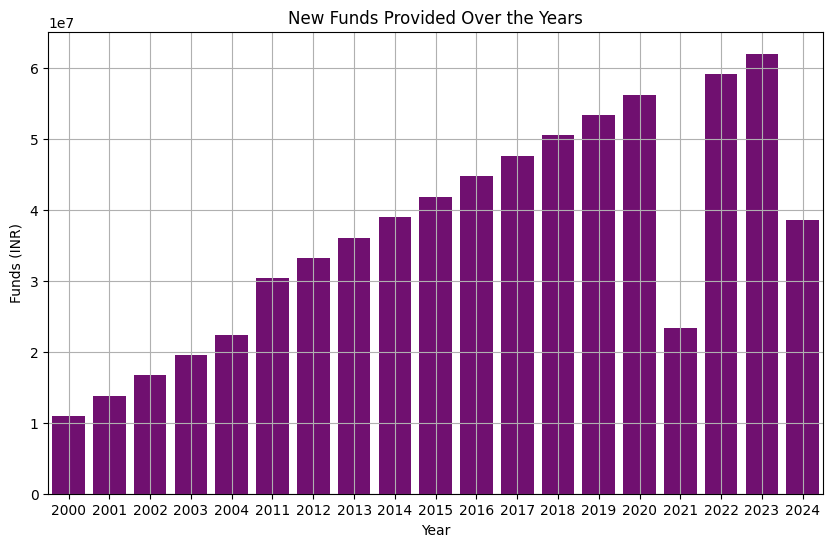

In [13]:
plt.figure(figsize=(10, 6))
sns.barplot(x=funds_by_year.index, y=funds_by_year.values, color='purple')
plt.title('New Funds Provided Over the Years')
plt.xlabel('Year')
plt.ylabel('Funds (INR)')
plt.grid(True)
plt.show()

In [14]:


# Create an SVR model
svr_model = SVR(kernel='rbf', C=1.0, epsilon=0.1)

# Train the model
svr_model.fit(X_train, y_train)

# Make predictions
y_pred = svr_model.predict(X_test)

# Calculate the coefficient of determination (R-squared)
r2 = svr_model.score(X_test, y_test)
print(f'R-squared: {r2:.2f}')


R-squared: 0.00


In [15]:
from sklearn.ensemble import GradientBoostingRegressor

# Create a Gradient Boosting Regressor model
gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)

# Train the model
gb_model.fit(X_train, y_train)

# Make predictions
y_pred = gb_model.predict(X_test)

# Calculate the coefficient of determination (R-squared)
r2 = gb_model.score(X_test, y_test)
print(f'R-squared: {r2:.2f}')

R-squared: 1.00


In [16]:
features = df.drop(columns=['New Funds Provided'])  # Replace with your actual target column name
target = df['New Funds Provided']  # Replace with your actual target column name


In [17]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer  # Import SimpleImputer
import pandas as pd

# Assuming 'df' is your DataFrame

# Preprocess categorical columns (e.g., 'Month' and other object-type columns)
label_encoders = {}
for col in df.select_dtypes(include=['object']).columns:  # Select non-numeric columns
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le  # Store the encoder for potential inverse transformation

# Define features and target
X = df.drop(columns=['New Funds Provided'])
y = df['New Funds Provided']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an imputer to fill NaN values with the mean of each column
imputer = SimpleImputer(strategy='mean')  # Create a SimpleImputer instance

# Fit the imputer on the training data and transform both training and testing data
X_train = imputer.fit_transform(X_train)  # Fit and transform X_train
X_test = imputer.transform(X_test)  # Transform X_test

# Create and train KNN model
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, y_train)

# Make predictions
y_pred = knn.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse:.2f}')


Mean Squared Error: 9034311111.11


In [25]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer

# Load your dataset (replace df with your actual DataFrame)
X = df.drop(columns=['Pension Recipients'])  # Replace with your target column
y = df['Pension Recipients']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an imputer to replace NaN with the most frequent value in each column
imputer = SimpleImputer(strategy='most_frequent')  # Initialize SimpleImputer

# Fit the imputer on the training data and transform both training and testing data
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

# Create a Gaussian Naive Bayes classifier (better for numeric data)
nb = GaussianNB()

# Train the model
nb.fit(X_train, y_train)

# Make predictions
y_pred = nb.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')


Accuracy: 0.00
